In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [221]:
#raw data
data = pd.read_csv('JnJ_folddif.txt',sep='\t',index_col = 0)
data

,50,53,54,55,57,58,59,60,61,62,65,68,69,70,71,0
sensor_ID,,,,,,,,,,,,,,,,
sample0,1.937,-1.271,1.925,1.438,7.315,3.251,2.035,2.566,0.675,5.978,1.333,2.326,8.863,0.464,7.243,0
sample1,1.642,-0.154,3.079,-0.184,-2.459,-1.512,-3.769,1.341,0.139,2.315,3.767,1.729,0.412,0.420,0.707,0
sample3,0.733,1.006,7.878,1.983,1.452,1.828,1.301,3.276,5.225,5.401,5.105,1.466,-0.053,2.150,3.309,0
sample5,-3.295,0.193,6.168,3.015,0.193,0.543,1.236,6.248,3.856,6.119,5.537,2.656,-0.083,4.259,3.846,0
sample10,1.036,3.294,6.799,2.496,-4.639,1.566,1.260,5.499,0.503,6.884,2.087,4.759,7.041,-1.164,13.788,0
sample15,1.795,3.199,8.584,3.221,-6.557,0.075,0.025,6.037,-0.800,9.458,5.579,3.757,2.581,-1.590,8.604,0
sample18,1.555,4.165,15.506,1.832,-1.625,-0.081,-0.157,4.468,3.076,6.522,3.613,3.051,2.089,-0.873,4.428,0


In [222]:
n_sample = data.shape[0]
n_feature = data.shape[1]
n = min(n_feature,n_sample)

In [223]:
#scaled data
z_scaler = StandardScaler()
Mscale = z_scaler.fit_transform(data.values)

df_scale=pd.DataFrame(Mscale,columns=data.columns,index=data.index)
df_scale

,50,53,54,55,57,58,59,60,61,62,65,68,69,70,71,0
sensor_ID,,,,,,,,,,,,,,,,
sample0,0.682760,-1.444672,-1.272153,-0.503036,1.959248,1.704072,0.978012,-0.945702,-0.548059,-0.060560,-1.625650,-0.463047,1.771576,-0.031057,0.314347,0.0
sample1,0.509893,-0.860271,-0.990329,-2.032210,-0.371005,-1.620997,-2.248776,-1.652527,-0.806748,-1.929170,-0.059917,-1.021993,-0.772696,-0.053941,-1.324443,0.0
sample3,-0.022770,-0.253372,0.181661,0.010775,0.561430,0.710670,0.569938,-0.536033,1.647901,-0.354905,0.800786,-1.268229,-0.912690,0.845817,-0.672036,0.0
sample5,-2.383130,-0.678724,-0.235947,0.983714,0.261267,-0.186394,0.533800,1.178810,0.987182,0.011369,1.078682,-0.154081,-0.921722,1.942690,-0.537392,0.0
sample10,0.154785,0.943682,-0.081847,0.494416,-0.890747,0.527767,0.547143,0.746637,-0.631071,0.401619,-1.140620,1.814871,1.223042,-0.877766,1.955394,0.0
sample15,0.599550,0.893979,0.354078,1.177925,-1.348024,-0.513106,-0.139466,1.057063,-1.259936,1.714696,1.105699,0.876739,-0.119694,-1.099325,0.655595,0.0
sample18,0.458912,1.399379,2.044537,-0.131584,-0.172169,-0.622011,-0.240651,0.151751,0.610732,0.216951,-0.158981,0.215741,-0.267816,-0.726419,-0.391466,0.0


In [224]:
#fit pca
pcaInstance = PCA(n_components = n)
pca_data = pcaInstance.fit_transform(Mscale)

In [225]:
#covariance matrix
df_cov=pd.DataFrame(pcaInstance.get_covariance(),columns=data.columns,index=data.columns)
df_cov

,50,53,54,55,57,58,59,60,61,62,65,68,69,70,71,0
50,1.166667,0.253749,0.053750,-0.500310,-0.085331,0.042261,-0.312225,-0.577730,-0.624743,0.024290,-0.552657,0.077397,0.504596,-0.970997,0.225226,0.0
53,0.253749,1.166667,0.984049,0.523341,-0.852916,-0.325329,0.011638,0.664253,-0.078169,0.674134,0.192444,0.795401,-0.060898,-0.711538,0.517303,0.0
54,0.053750,0.984049,1.166667,0.421655,-0.473518,-0.314340,0.062375,0.514590,0.402800,0.489705,0.363032,0.335021,-0.354477,-0.335731,0.031362,0.0
55,-0.500310,0.523341,0.421655,1.166667,-0.329027,0.333280,0.791193,1.097027,0.171258,1.024684,0.461446,0.674374,0.043585,0.068681,0.631344,0.0
57,-0.085331,-0.852916,-0.473518,-0.329027,1.166667,0.769842,0.491998,-0.558144,0.427337,-0.384291,-0.479758,-0.685989,0.353741,0.555074,-0.328094,0.0
58,0.042261,-0.325329,-0.314340,0.333280,0.769842,1.166667,1.021236,0.037301,0.215742,0.327806,-0.562583,0.061464,0.778016,0.137694,0.540709,0.0
59,-0.312225,0.011638,0.062375,0.791193,0.491998,1.021236,1.166667,0.556595,0.404634,0.668538,-0.193833,0.309851,0.534729,0.242978,0.614764,0.0
60,-0.577730,0.664253,0.514590,1.097027,-0.558144,0.037301,0.556595,1.166667,0.070252,0.932375,0.461958,0.823252,-0.041630,0.004587,0.618620,0.0
61,-0.624743,-0.078169,0.402800,0.171258,0.427337,0.215742,0.404634,0.070252,1.166667,-0.210907,0.425561,-0.546990,-0.591012,0.811252,-0.506804,0.0
62,0.024290,0.674134,0.489705,1.024684,-0.384291,0.327806,0.668538,0.932375,-0.210907,1.166667,0.224242,0.787837,0.320779,-0.427882,0.765496,0.0


In [226]:
#eigenvalue
eigenvalue=pcaInstance.explained_variance_ratio_

In [227]:
#eigenvectors
df_comp = pd.DataFrame(pcaInstance.components_,index=['PC'+str(i) for i in range(n)],columns=data.columns)
df_comp

,50,53,54,55,57,58,59,60,61,62,65,68,69,70,71,0
PC0,-0.043700,-0.325418,-0.195758,-0.327134,0.224962,-0.078569,-0.193054,-0.339260,0.130421,-0.380382,0.017216,-0.394432,-0.172100,0.238924,-0.365283,-0.0
PC1,0.316524,-0.154946,-0.260090,-0.202486,0.210639,0.266467,0.067057,-0.246268,-0.273583,-0.061089,-0.459450,0.058185,0.445064,-0.226565,0.210157,0.0
PC2,0.306237,0.221083,0.118638,-0.249524,-0.353686,-0.421016,-0.463326,-0.144556,-0.293011,-0.106429,0.016982,0.070248,-0.108346,-0.352198,-0.070002,0.0
PC3,0.344763,0.319324,0.579302,-0.099001,0.220148,0.175721,0.160214,-0.188006,0.438611,0.025237,-0.112059,-0.188992,-0.022675,-0.180457,-0.138024,0.0
PC4,0.412373,-0.191483,-0.158453,0.205604,0.074564,0.139855,0.063239,-0.085955,-0.257297,0.467967,0.475093,-0.341541,-0.099168,-0.160522,-0.161975,-0.0
PC5,0.223978,0.130738,-0.345810,-0.013105,-0.465765,0.313119,0.095747,-0.210811,0.338444,-0.268028,0.197032,-0.035540,-0.226240,0.013937,0.408104,0.0
PC6,0.217491,0.031864,-0.229914,0.219579,-0.035281,-0.725758,0.339577,-0.111954,0.253260,0.101390,-0.176222,-0.179110,0.188945,0.117045,0.088522,0.0


In [228]:
df_projection = np.dot(df_comp.T,Mscale)
pd.DataFrame(df_projection,columns=data.columns,index=data.columns)

,50,53,54,55,57,58,59,60,61,62,65,68,69,70,71,0
50,-0.399107,0.372978,0.206639,0.160283,-0.647738,-0.466750,-0.253909,0.338177,0.203981,-0.115891,0.411911,0.246945,-0.499977,0.146891,0.044020,0.0
53,-1.003845,0.311435,0.659358,0.850219,-0.383698,-0.393733,0.195964,0.821780,0.958482,0.397976,1.417689,-0.246568,-1.211259,0.827015,-0.518443,0.0
54,-1.986893,-0.697105,-0.188066,0.742748,0.577802,0.301173,0.787139,0.715487,1.479772,-0.228384,0.888628,-0.523624,-0.878893,1.932115,-0.554650,0.0
55,0.039749,1.266795,1.022192,0.533301,-0.935050,-0.409453,0.001825,0.834014,-0.145415,0.605614,-0.046583,1.099152,0.090130,-0.707871,0.693726,0.0
57,-0.539488,-0.961399,-0.854136,-0.835603,0.789074,0.049802,-0.223483,-0.553759,-0.140507,-1.068308,-1.018524,-0.185447,0.512061,0.582383,-0.234619,0.0
58,-0.450635,-0.732029,-1.666300,0.199804,-0.864973,-0.533210,-0.614714,0.392052,-1.618248,0.077735,0.266238,0.642691,0.205142,0.033560,0.573749,0.0
59,-0.245850,0.850336,0.780220,0.212819,-0.865248,-1.023785,-0.578621,0.708937,-0.506799,0.311832,0.091365,0.855755,-0.143685,-0.485705,0.129270,0.0
60,-0.096942,0.439967,0.397075,0.208541,-0.323588,-0.114171,0.048569,0.279660,0.212279,0.124519,0.130463,0.256100,-0.155420,-0.075162,0.155246,0.0
61,-0.809735,0.237647,0.606998,1.156808,0.036469,-0.091245,0.560986,1.206948,-0.010001,1.160806,0.670288,0.407638,-0.117423,0.284772,-0.015827,0.0
62,-0.390310,0.955800,0.593205,0.241482,-0.848744,-0.308074,-0.012803,0.628942,0.211585,-0.070701,-0.282226,1.005836,0.024473,-0.215650,0.718949,0.0


In [229]:
df_projection2 = np.dot(Mscale,df_comp.T)
pd.DataFrame(df_projection2,columns=['PC'+str(i) for i in range(n)],index=data.index)

,PC0,PC1,PC2,PC3,PC4,PC5,PC6
sensor_ID,,,,,,,
sample0,0.971854,3.773105,-1.958656,0.101981,0.460757,-0.421451,-2.040341e-16
sample1,3.789574,0.406444,3.014360,-0.880152,-0.215267,0.071228,1.081709e-15
sample3,1.655229,-1.149464,-1.401017,1.280578,0.523035,0.827129,1.617387e-17
sample5,0.642692,-2.774759,-2.414668,-1.297737,-0.504261,-0.365889,2.253426e-16
sample10,-3.165386,1.561686,0.144406,-0.518790,-1.132978,0.553591,-4.115564e-17
sample15,-2.991277,-0.853175,1.355256,-0.715676,1.424794,-0.075709,1.422489e-15
sample18,-0.902687,-0.963836,1.260318,2.029796,-0.556080,-0.588899,-2.386980e-15


In [230]:
df_pca=pd.DataFrame(pca_data,columns=['PC'+str(i) for i in range(n)],index=data.index)
df_pca

,PC0,PC1,PC2,PC3,PC4,PC5,PC6
sensor_ID,,,,,,,
sample0,0.971854,3.773105,-1.958656,0.101981,0.460757,-0.421451,1.348165e-16
sample1,3.789574,0.406444,3.014360,-0.880152,-0.215267,0.071228,1.348165e-16
sample3,1.655229,-1.149464,-1.401017,1.280578,0.523035,0.827129,1.348165e-16
sample5,0.642692,-2.774759,-2.414668,-1.297737,-0.504261,-0.365889,1.348165e-16
sample10,-3.165386,1.561686,0.144406,-0.518790,-1.132978,0.553591,1.348165e-16
sample15,-2.991277,-0.853175,1.355256,-0.715676,1.424794,-0.075709,1.348165e-16
sample18,-0.902687,-0.963836,1.260318,2.029796,-0.556080,-0.588899,1.348165e-16


Text(0, 0.5, 'second principal component')

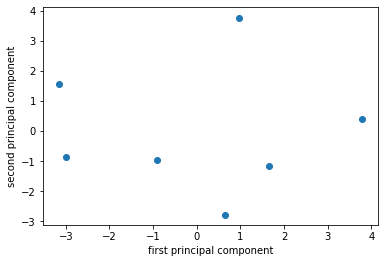

In [238]:
plt.scatter(df_pca['PC0'],df_pca['PC1'])
plt.xlabel('first principal component')
plt.ylabel('second principal component')

In [232]:
df_comp.shape,df_cov.shape

((7, 16), (16, 16))

In [233]:
# calculate eigenvalue manually using definition U'*A*U = W. 
# U is the eigenvector matrix, A is covariance matrix,W is eigenvalue diagonal matrix
a = np.dot(df_comp,df_cov)
b = np.dot(a,df_comp.T)

In [234]:
pd.DataFrame(b) # W

,0,1,2,3,4,5,6
0,6.373409e+00,3.493506e-15,2.248946e-15,-1.197541e-15,-1.620381e-15,2.588987e-15,6.909265e-16
1,2.997454e-15,4.586305e+00,-3.553901e-15,-1.745559e-16,-7.565449e-16,-1.047916e-15,-2.255202e-16
2,2.234440e-15,-3.384680e-15,4.027024e+00,-1.970772e-15,-1.938724e-15,-1.138230e-15,-1.397464e-16
3,-1.407925e-15,-3.866563e-16,-1.719225e-15,1.501746e+00,-6.589534e-16,4.781195e-17,1.140067e-16
4,-1.657395e-15,-6.399141e-16,-2.100537e-15,-8.446281e-16,7.348971e-01,-2.527272e-17,-1.135980e-17
5,2.904788e-15,-1.087479e-15,-9.454577e-16,1.392992e-16,-1.309223e-16,2.766182e-01,-2.207629e-17
6,7.586976e-16,-2.763587e-16,-6.176819e-17,1.918032e-16,5.695336e-17,6.660482e-17,-1.895240e-16


In [235]:
sum1 = 0
for i in range(7):
    sum1 += b[i][i]

In [236]:
frac = []
for i in range(7):
    frac.append(b[i][i]/sum1)

In [237]:
dict(zip(frac,eigenvalue))

{0.3641948278170641: 0.36419482781706397,
 0.2620745541321815: 0.2620745541321816,
 0.23011568422177692: 0.23011568422177683,
 0.08581406133449897: 0.0858140613344991,
 0.04199411963836481: 0.04199411963836488,
 0.015806752856113642: 0.015806752856113677,
 -1.0829942322830809e-17: 1.2116993056478187e-33}